In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/UrbanSound8K_Images.zip"
extract_path = "/content/UrbanSound8K_Images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files and folders:", os.listdir(extract_path))

Extracted files and folders: ['UrbanSound8K.csv', 'Images']


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data_path = "/content/UrbanSound8K_Images"
csv_path = os.path.join(data_path, "/content/UrbanSound8K_Images/UrbanSound8K.csv")
images_path = os.path.join(data_path, "/content/UrbanSound8K_Images/Images/Images")  # Adjusted path


In [ ]:

df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB
None


In [ ]:
print(df.describe())

                fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID  
count  8732.000000  
mean      4.592877  
std       2.894544  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       7.000000  
max       9.000000  


In [ ]:
print(df.head())

      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


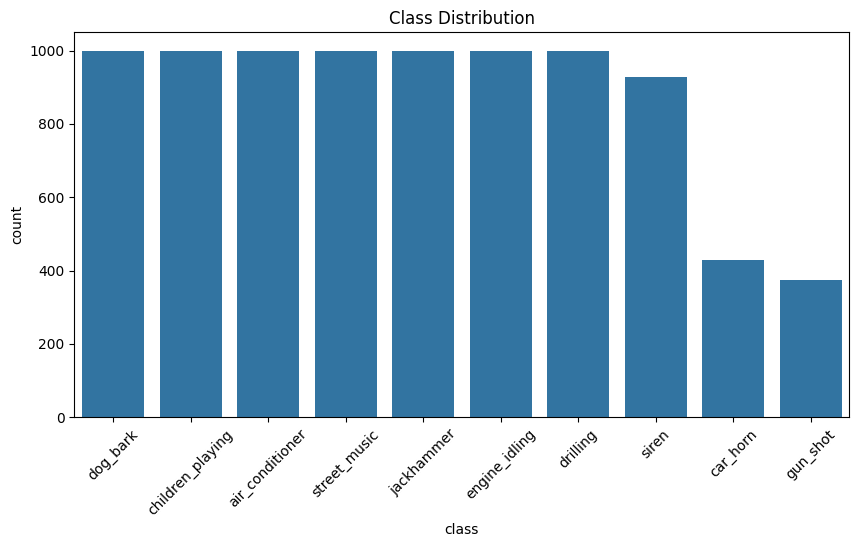

In [ ]:

plt.figure(figsize=(10, 5))
sns.countplot(x=df['class'], order=df['class'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

In [ ]:

def preprocess_images(image_paths, target_size=(128, 128)):
    processed_images = []

    for img_path in image_paths[:100]:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, target_size)
            img = img / 255.0
            processed_images.append(img)

    return np.array(processed_images)



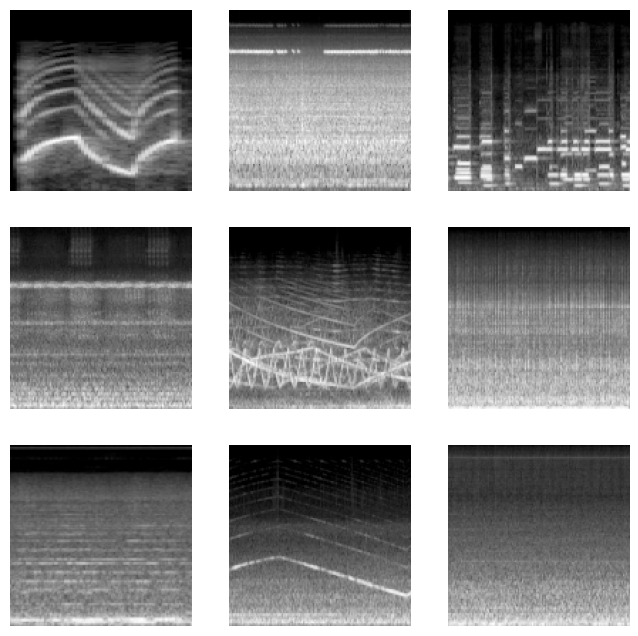

In [ ]:


image_paths = []
for fold in os.listdir(images_path):
    fold_path = os.path.join(images_path, fold)
    if os.path.isdir(fold_path):
        for file in os.listdir(fold_path):
            if file.endswith(".jpg"):
                image_paths.append(os.path.join(fold_path, file))

images = preprocess_images(image_paths)


def plot_images(images, num=9):
    plt.figure(figsize=(8, 8))
    for i in range(num):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

plot_images(images)

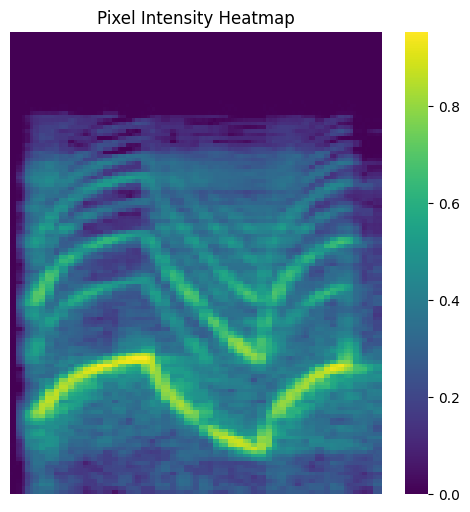

In [ ]:

def plot_heatmap(image):
    plt.figure(figsize=(6, 6))
    sns.heatmap(image, cmap='viridis', xticklabels=False, yticklabels=False)
    plt.title("Pixel Intensity Heatmap")
    plt.show()

plot_heatmap(images[0])

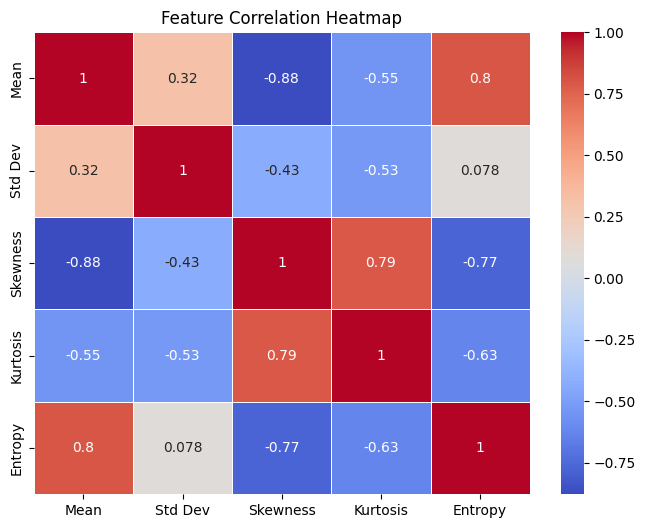

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

def extract_features(images):
    features = []
    for img in images:
        mean_intensity = np.mean(img)
        std_dev = np.std(img)
        skewness = stats.skew(img.flatten())
        kurt = stats.kurtosis(img.flatten())
        entropy = -np.sum(img * np.log2(img + 1e-8))

        features.append([mean_intensity, std_dev, skewness, kurt, entropy])

    return pd.DataFrame(features, columns=["Mean", "Std Dev", "Skewness", "Kurtosis", "Entropy"])

feature_df = extract_features(images)

corr_matrix = feature_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:

sample_images = []
sample_files = os.listdir(os.path.join(images_path, "fold1"))[:5]
for file in sample_files:
    img = cv2.imread(os.path.join(images_path, "fold1", file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sample_images.append(img)

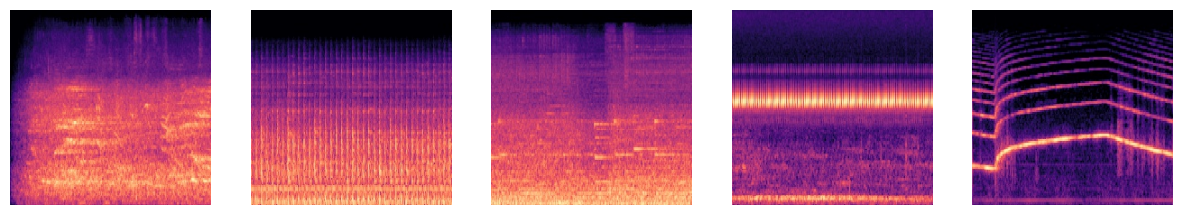

In [ ]:

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, img in enumerate(sample_images):
    axes[i].imshow(img)
    axes[i].axis("off")
plt.show()

In [ ]:

sample_gray = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in sample_images]
print("Sample images in grayscale:")
print(sample_gray)

Sample images in grayscale:
[array([[  0,   0,   0, ...,   1,   1,   6],
       [  0,   0,   0, ...,   1,   1,   6],
       [  0,   0,   0, ...,   1,   1,   6],
       ...,
       [ 32,  34,  47, ..., 126, 118, 125],
       [ 33,  32,  48, ..., 130, 117, 118],
       [ 31,  20,  22, ..., 101, 102, 125]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [207, 179, 162, ..., 202, 186, 196],
       [204, 182, 165, ..., 200, 187, 198],
       [196, 138, 175, ..., 194, 168, 209]], dtype=uint8), array([[  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [217, 212, 178, ..., 213, 163, 159],
       [214, 209, 181, ..., 215, 160, 162],
       [187, 202, 186, ..., 200, 164, 156]], dtype=uint8), array([[ 37,  25,  33, ...,  39,  32,  37],
       [ 36,  30,  34, ...,  39,  33,  39],
       [ 3

In [ ]:

hist_features = []
for img in sample_gray:
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    hist_features.append(hist)

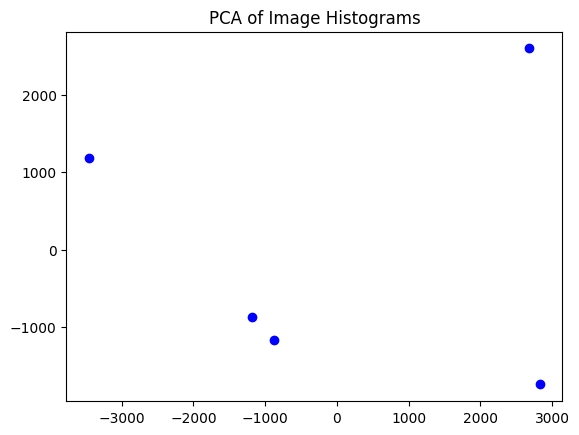

In [ ]:

pca = PCA(n_components=2)
pca_features = pca.fit_transform(hist_features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c='blue')
plt.title("PCA of Image Histograms")
plt.show()


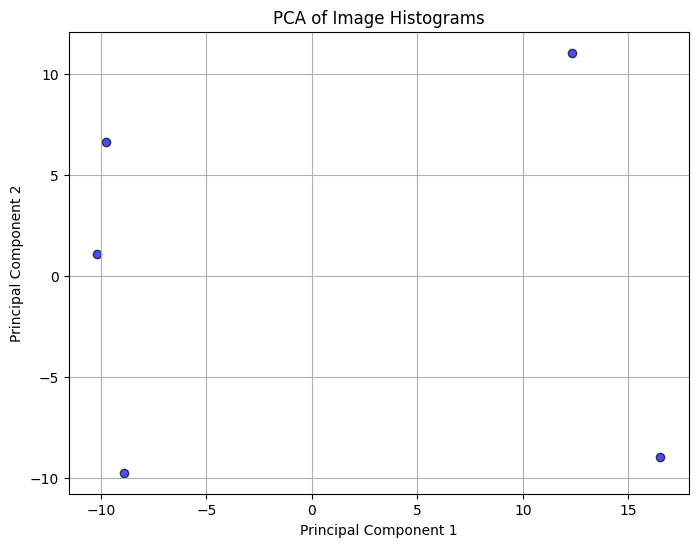

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hist_features_scaled = scaler.fit_transform(hist_features)

pca = PCA(n_components=2)
pca_features = pca.fit_transform(hist_features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c='blue', edgecolors='black', alpha=0.7)
plt.title("PCA of Image Histograms")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


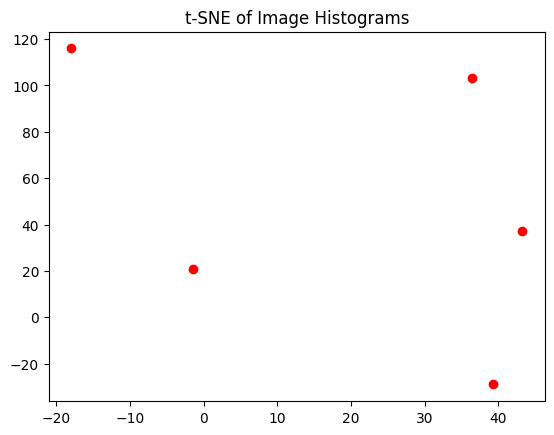

In [ ]:

tsne = TSNE(n_components=2, perplexity=3)

hist_features_array = np.array(hist_features)
tsne_features = tsne.fit_transform(hist_features_array)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c='red')
plt.title("t-SNE of Image Histograms")
plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

df = pd.read_csv("/content/UrbanSound8K_Images/UrbanSound8K.csv")

image_dir = "/content/UrbanSound8K_Images/Images/Images"

def load_images_and_labels():
    images, labels = [], []
    for fold in os.listdir(image_dir):
        fold_path = os.path.join(image_dir, fold)
        if os.path.isdir(fold_path):
            for file in os.listdir(fold_path):
                if file.endswith(".jpg"):
                    file_path = os.path.join(fold_path, file)
                    img = Image.open(file_path).resize((128, 128))
                    img_array = np.array(img) / 255.0  # Normalize
                    images.append(img_array)

                    file_name = file.replace(".jpg", "")
                    label_row = df[df['slice_file_name'].str.startswith(file_name)]
                    if not label_row.empty:
                        labels.append(label_row.iloc[0]['classID'])
                    else:
                        print(f"Warning: No label found for image: {file}")

    return np.array(images), np.array(labels)

# Load dataset
X, y = load_images_and_labels()
y = to_categorical(y, num_classes=10)  # One-hot encoding

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN Model from Scratch
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # 10 classes
    ])
    return model

# Compile and Train CNN Model
model = build_cnn_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Train model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=32)
model.save("urban_sound_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,068,362 (99.44 MB)

 Trainable params: 26,067,466 (99.44 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.4469 - loss: 2.5688 - val_accuracy: 0.0796 - val_loss: 11.8535
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.6931 - loss: 0.9468 - val_accuracy: 0.2891 - val_loss: 6.6468
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.7862 - loss: 0.6550 - val_accuracy: 0.5804 - val_loss: 1.4581
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8463 - loss: 0.4617 - val_accuracy: 0.8483 - val_loss: 0.4321
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.8776 - loss: 0.3511 - val_accuracy: 0.8838 - val_loss: 0.3907
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9082 - loss: 0.2607 - val_accuracy: 0.8666 - val_loss: 0.4240
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9290 - loss: 0.2087 - val_accuracy: 0.8815 - val_loss: 0.4404
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9413 - loss: 0.1835 -

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax outputs to class labels
y_true_classes = np.argmax(y_val, axis=1)  # Convert one-hot labels to class labels


print("Classification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, digits=4))


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Classification Report:

              precision    recall  f1-score   support

           0     0.9013    0.9853    0.9415       204
           1     0.9278    0.9574    0.9424        94
           2     0.8611    0.8158    0.8378       190
           3     0.9036    0.8725    0.8878       204
           4     0.9787    0.9064    0.9412       203
           5     0.9676    0.9372    0.9522       223
           6     0.9483    0.9483    0.9483        58
           7     0.9482    0.9683    0.9581       189
           8     0.8871    0.9649    0.9244       171
           9     0.8995    0.8910    0.8952       211

    accuracy                         0.9204      1747
   macro avg     0.9223    0.9247    0.9229      1747
weighted avg     0.9211    0.9204    0.9201      1747



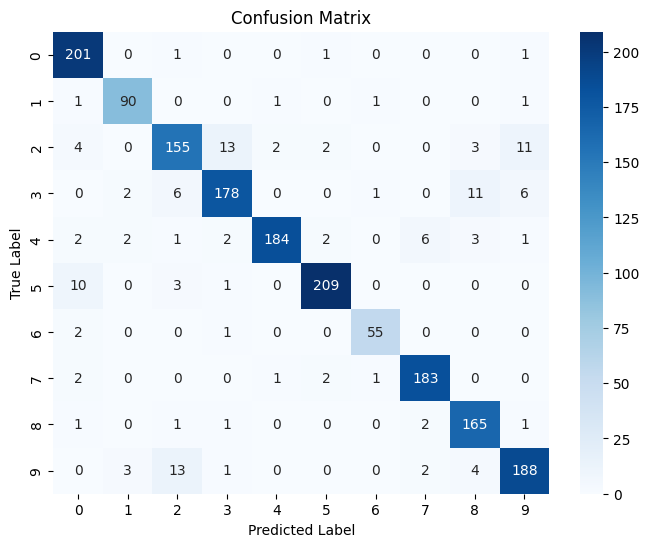

In [ ]:


conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


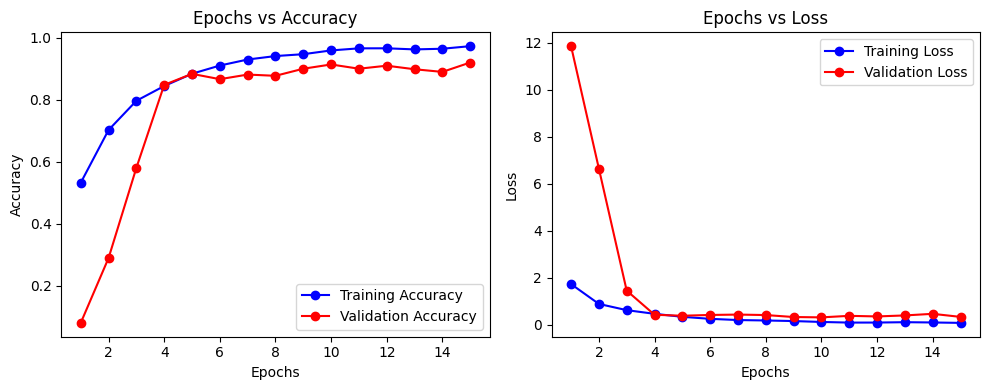

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import os
import cv2
from scipy.stats import norm

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

data = pd.read_csv("/content/UrbanSound8K_Images/UrbanSound8K.csv")


In [ ]:

group1 = data[data['class'] == 'air_conditioner']['fsID']
group2 = data[data['class'] == 'car_horn']['fsID']
group1 = group1.dropna()
group2 = group2.dropna()

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

data = pd.read_csv("/content/UrbanSound8K_Images/UrbanSound8K.csv")

group1 = data[data['class'] == 'air_conditioner']['fsID']
group2 = data[data['class'] == 'car_horn']['fsID']
group1 = group1.dropna()
group2 = group2.dropna()

# Perform Z-test
z_stat, z_pval = ztest(group1, group2)

# Significance level
alpha = 0.05

print(f"Z-test: Statistic={z_stat}, P-value={z_pval}")
if z_pval < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")

Z-test: Statistic=11.168362556120218, P-value=5.824468473200402e-29
Reject the null hypothesis (H0)


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest

data = pd.read_csv("/content/UrbanSound8K_Images/UrbanSound8K.csv")

# Selecting two sample groups for testing
group1 = data[data['class'] == 'air_conditioner']['fsID']
group2 = data[data['class'] == 'car_horn']['fsID']

group1 = group1.dropna()
group2 = group2.dropna()

# Perform T-test (Welch's t-test)
t_stat, t_pval = stats.ttest_ind(group1, group2, equal_var=False)
print(f"T-test: Statistic={t_stat}, P-value={t_pval}")

# Significance level for T-test
alpha_t = 0.05
if t_pval < alpha_t:
    print("Reject the null hypothesis (H0) for T-test")
else:
    print("Fail to reject the null hypothesis (H0) for T-test")

T-test: Statistic=10.503613224420691, P-value=4.3623331095054934e-24
Reject the null hypothesis (H0) for T-test


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

data = pd.read_csv("/content/UrbanSound8K_Images/UrbanSound8K.csv")

unique_classes = data['class'].unique()

groups = [data[data['class'] == label]['fsID'].dropna() for label in unique_classes]

# Perform ANOVA test
anova_stat, anova_pval = stats.f_oneway(*groups)
print(f"ANOVA: Statistic={anova_stat}, P-value={anova_pval}")

# Significance level for ANOVA
alpha_anova = 0.05
if anova_pval < alpha_anova:
    print("Reject the null hypothesis (H0) for ANOVA")
else:
    print("Fail to reject the null hypothesis (H0) for ANOVA")

ANOVA: Statistic=44.49293521120506, P-value=8.187076338150239e-79
Reject the null hypothesis (H0) for ANOVA
